d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        tex

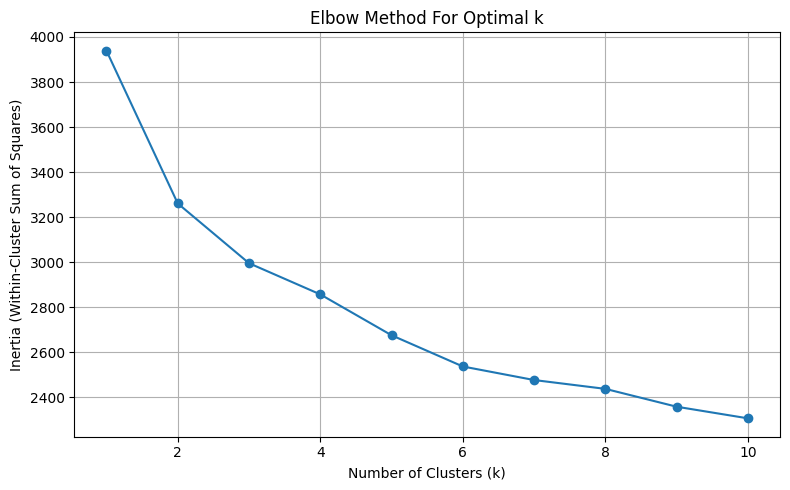

In [2]:
# Unsupervised Learning – Clustering

# K-Means Clustering with Elbow Method
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load cleaned datset
df = pd.read_csv('cleaned_heart_data.csv')

# Convert target to binary
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

# Drop the target column
X_cluster = df.drop('target', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method to determine optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.tight_layout()
plt.show()

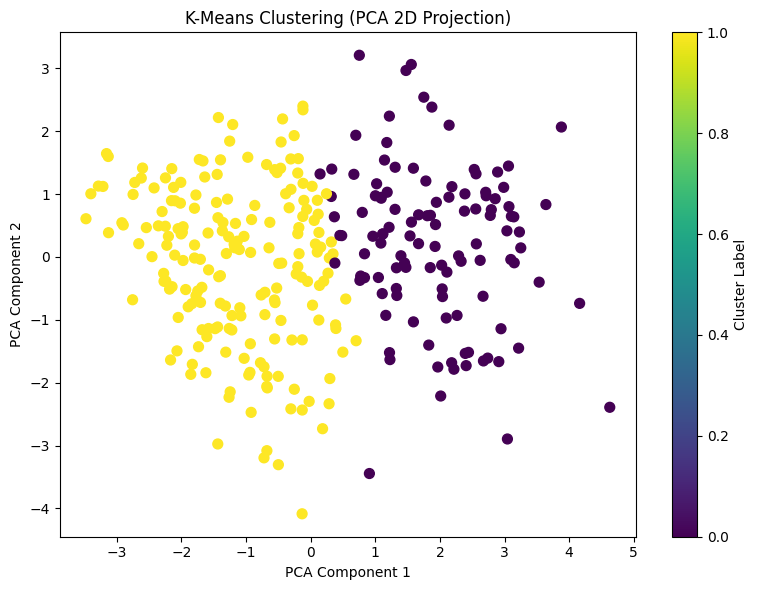

In [3]:
# Final KMeans Clustering and Visualization
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Cluster'] = clusters

# Visualize using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-Means Clustering (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()

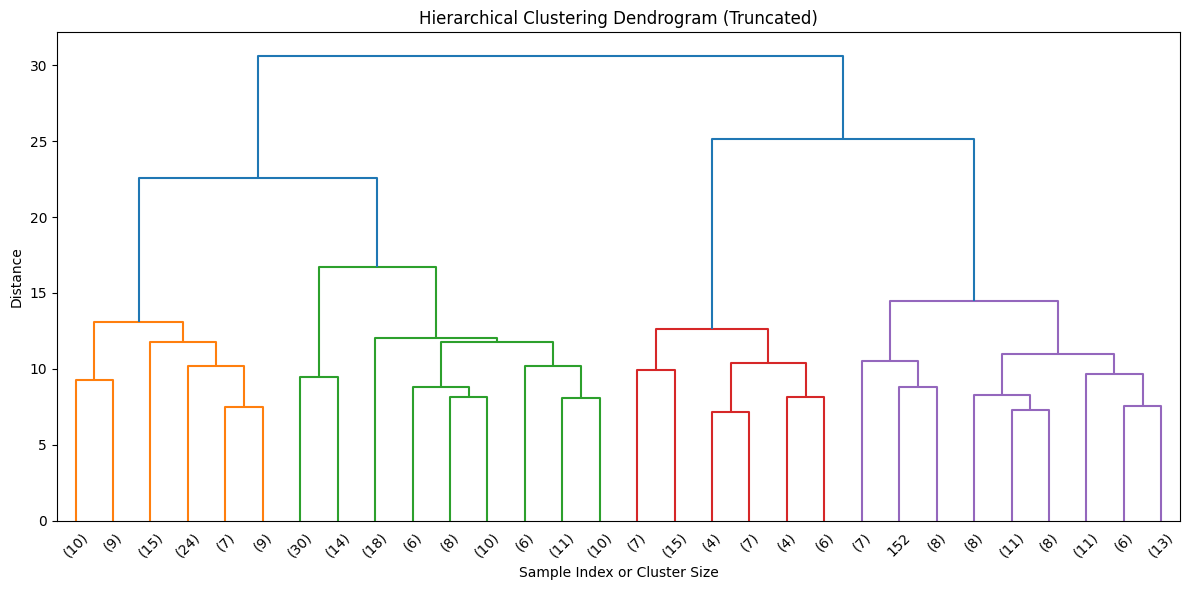

In [4]:
# Cell 10: Hierarchical Clustering (Dendrogram)
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform linkage for dendrogram
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()